In [1]:
#segmenting customers or clustering them, will help business in various ways.
# now we are going to cluster customers using R language.

In [2]:
data = read.csv("/kaggle/input/mall-customer-dataset/Mall_Customers.csv")
str(data)

'data.frame':	400 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [3]:
names(data)  # headings of the csv file

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

In [4]:
head(data)  # can see the head of the data

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [5]:
summary(data)  # gives the summary of the whole data set

   CustomerID       Gender               Age        Annual.Income..k..
 Min.   :  1.0   Length:400         Min.   :18.00   Min.   : 15.00    
 1st Qu.:100.8   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :200.5   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :200.5                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:300.2                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :400.0                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

In [6]:
summary(data$Age)  # if we want summary for individual columns

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

The Mean, median , quartiles will be helpful as we are doing customer segmentation

In [7]:
sd(data$Age)  # we can find the standard deviation

[1] 13.95149

Standard deviations is the measure of how much deviation in the data from the mean value, here it is approx. 14

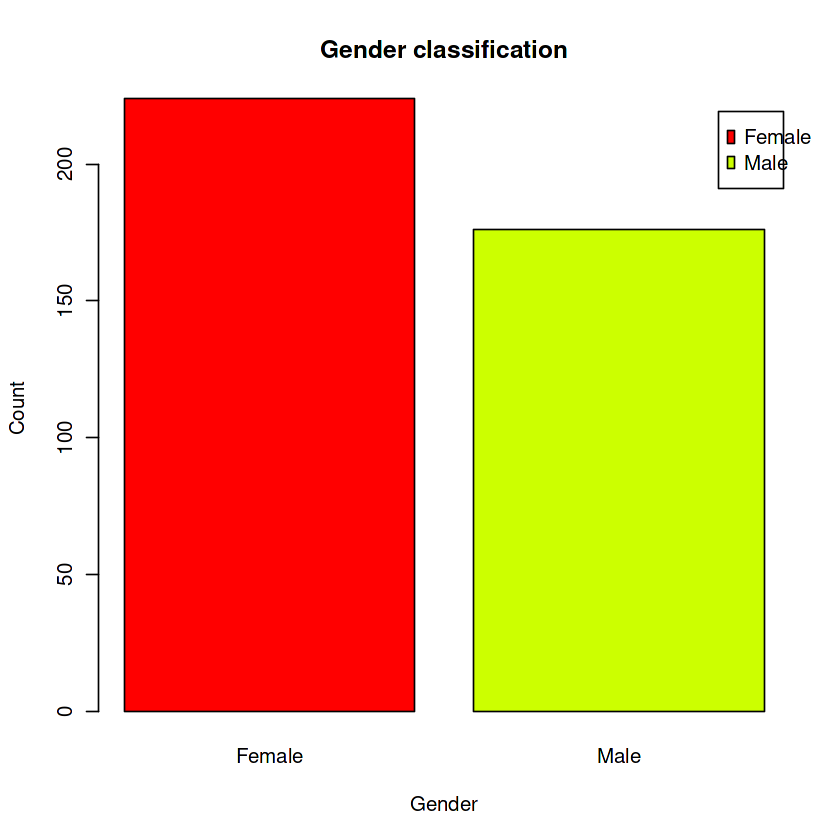

In [8]:
a=table(data$Gender)
barplot(a,main="Gender classification",
        ylab="Count",
        xlab="Gender",
        col=rainbow(5),
        legend=rownames(a))

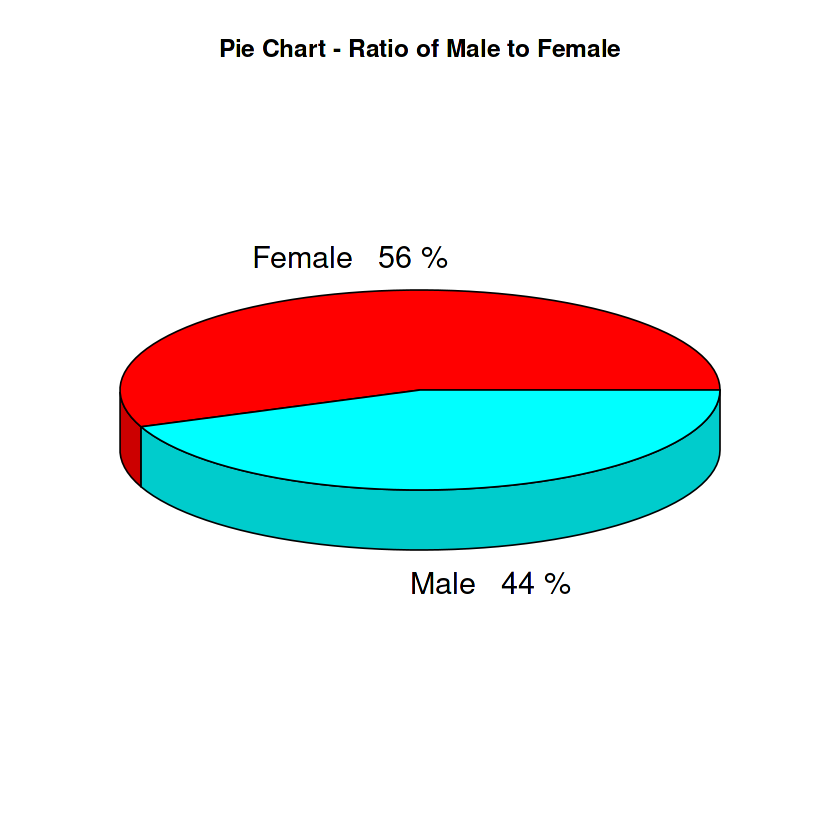

In [9]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
      main="Pie Chart - Ratio of Male to Female")

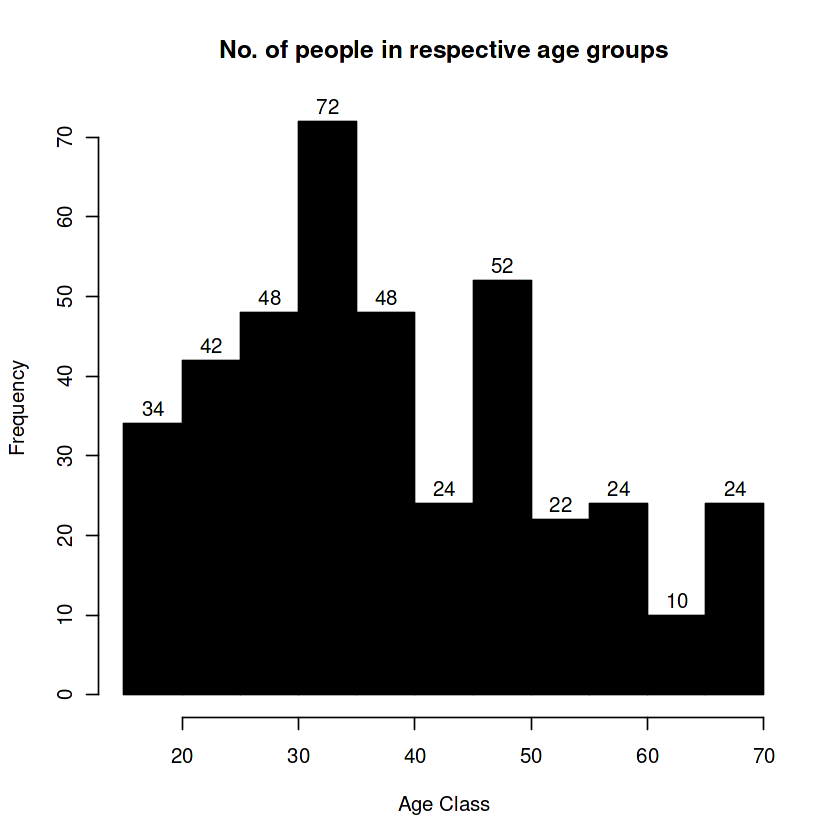

In [10]:
hist(data$Age,
     col=1,
     main="No. of people in respective age groups",
     xlab="Age Class",
     ylab="Frequency",
     labels=TRUE)

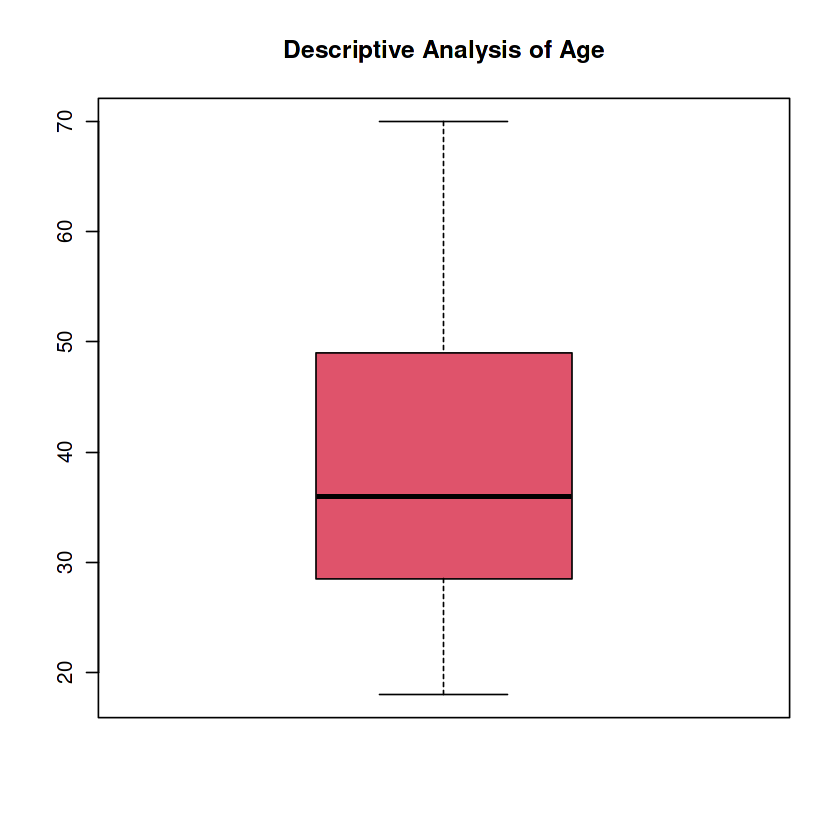

In [11]:
boxplot(data$Age,
        col=2,
        main="Descriptive Analysis of Age")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

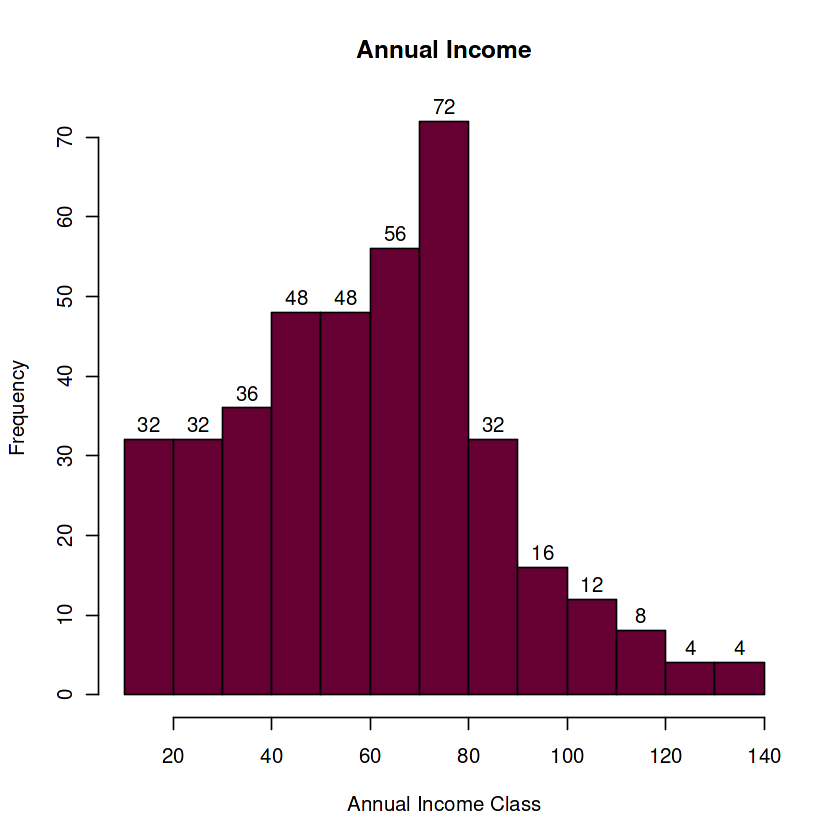

In [12]:
summary(data$Annual.Income..k..)
hist(data$Annual.Income..k..,
     col="#660033",
     main="Annual Income",
     xlab="Annual Income Class",
     ylab="Frequency",
     labels=TRUE)

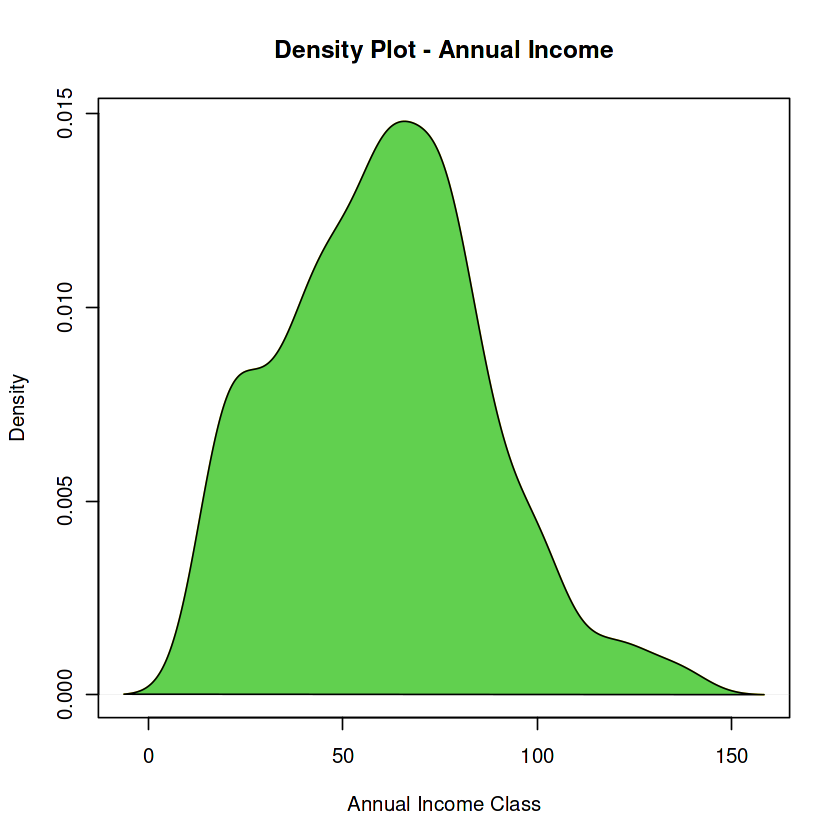

In [13]:
plot(density(data$Annual.Income..k..),
     col="yellow",
     main="Density Plot - Annual Income",
     xlab="Annual Income Class",
     ylab="Density")
polygon(density(data$Annual.Income..k..),
        col=3)


From the plot, we can infer that the most of the income range lies between 60 to 80k($) approx.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

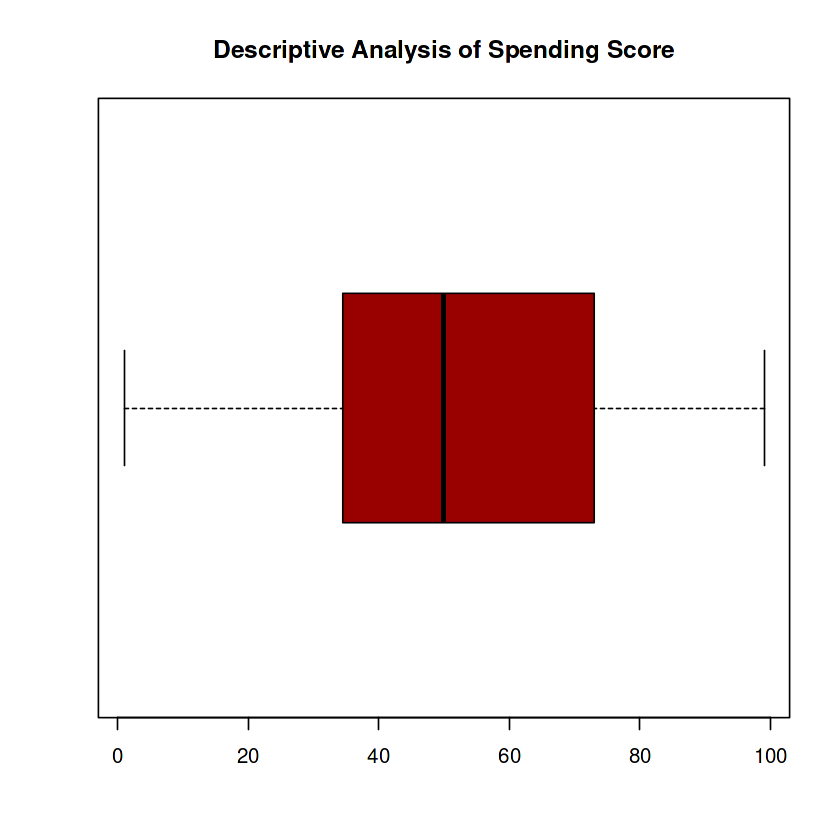

In [14]:
summary(data$Spending.Score..1.100.)
boxplot(data$Spending.Score..1.100.,
        horizontal=TRUE,
        col="#990000",
        main="Descriptive Analysis of Spending Score")


The most of the spending lies in between 45k to 70k($) approx.

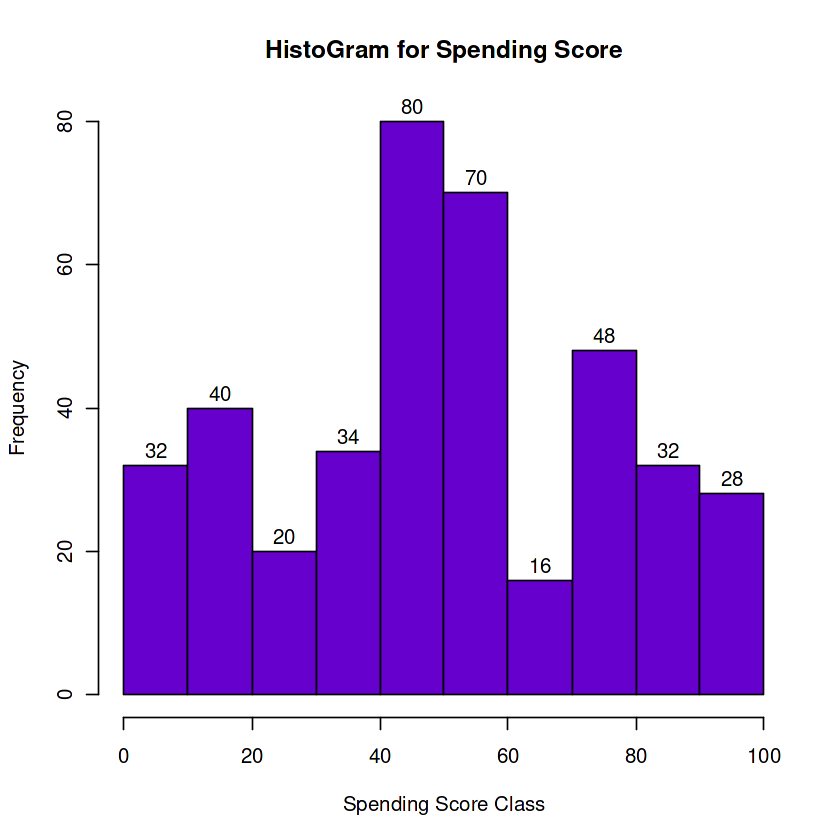

In [15]:
hist(data$Spending.Score..1.100.,
     main="HistoGram for Spending Score",
     xlab="Spending Score Class",
     ylab="Frequency",
     col="#6600cc",
     labels=TRUE)

In [16]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square 
iss <- function(k) {
  kmeans(data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

In [17]:
k.values <- 1:10

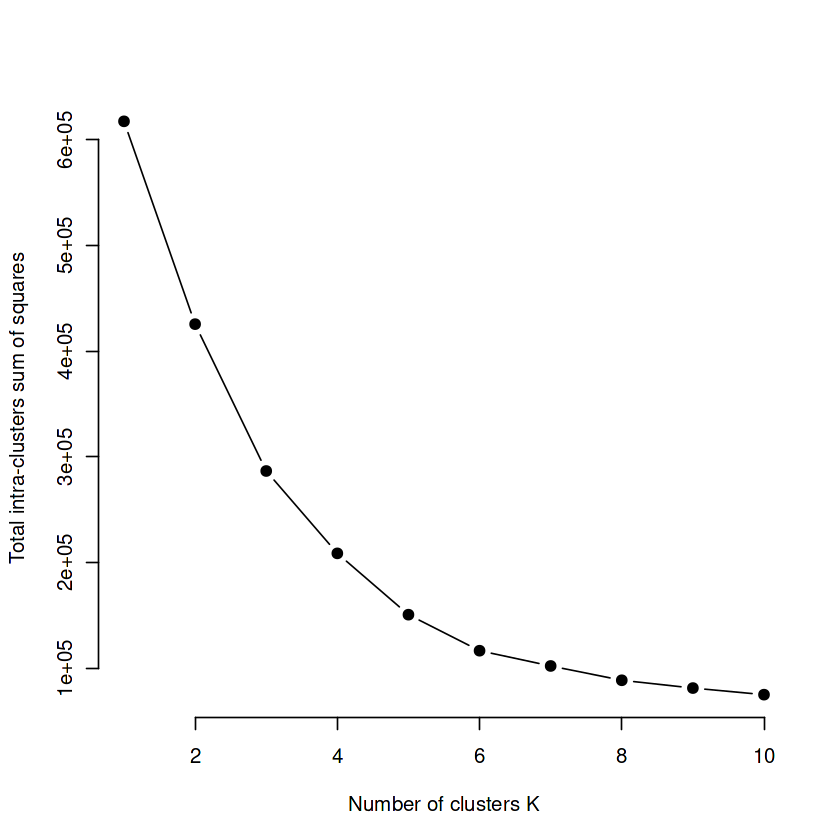

In [18]:
iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total intra-clusters sum of squares")

In [19]:
library(cluster) 
library(gridExtra)
library(grid)

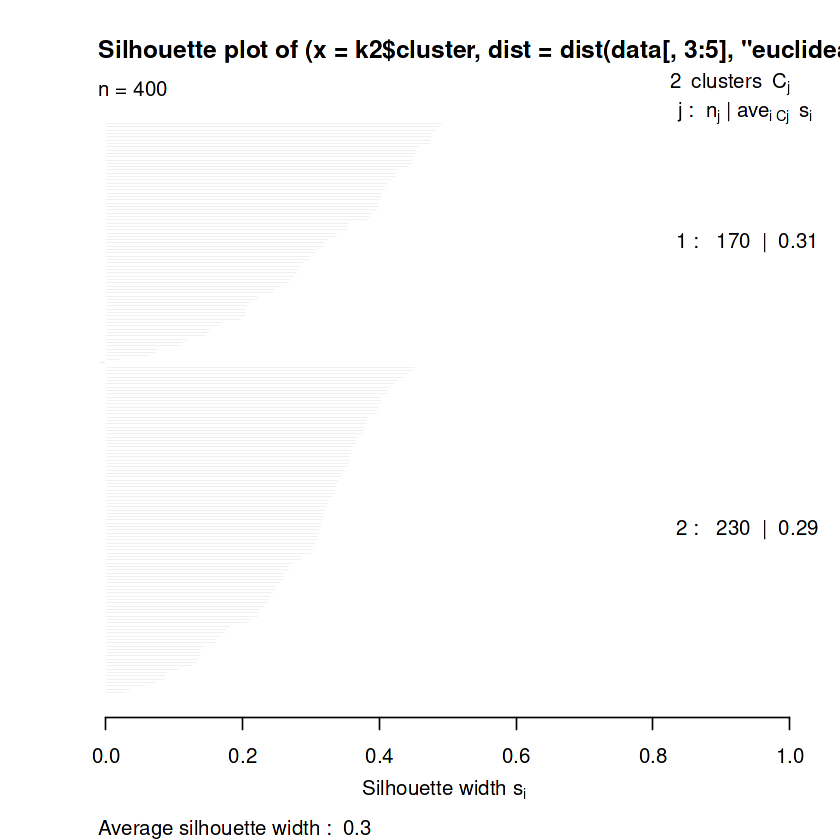

In [20]:
k2<-kmeans(data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(data[,3:5],"euclidean")))

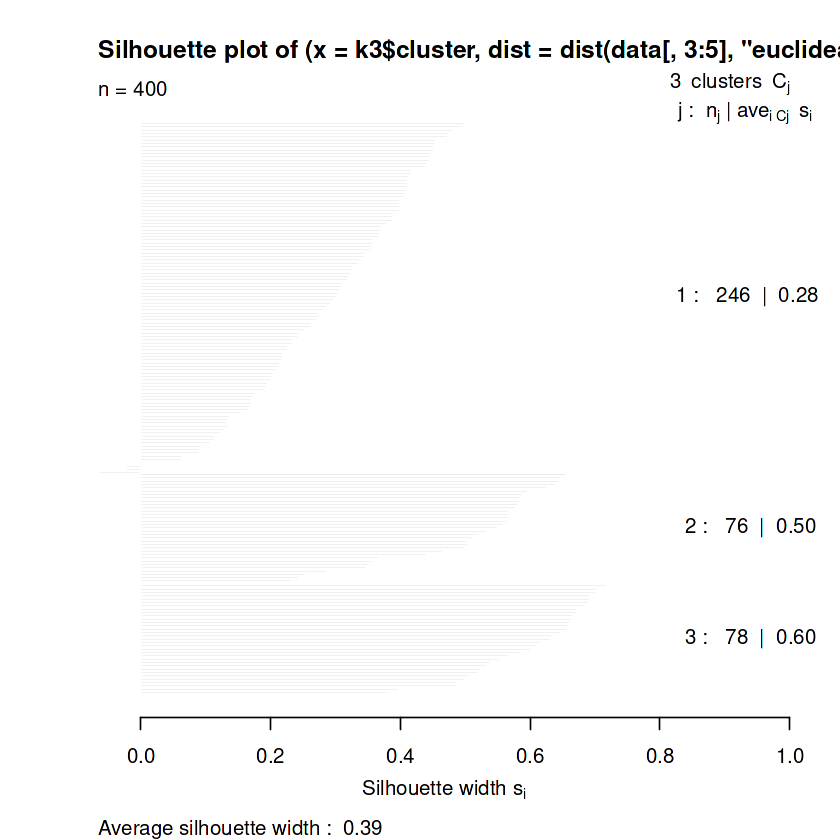

In [21]:
k3<-kmeans(data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(data[,3:5],"euclidean")))

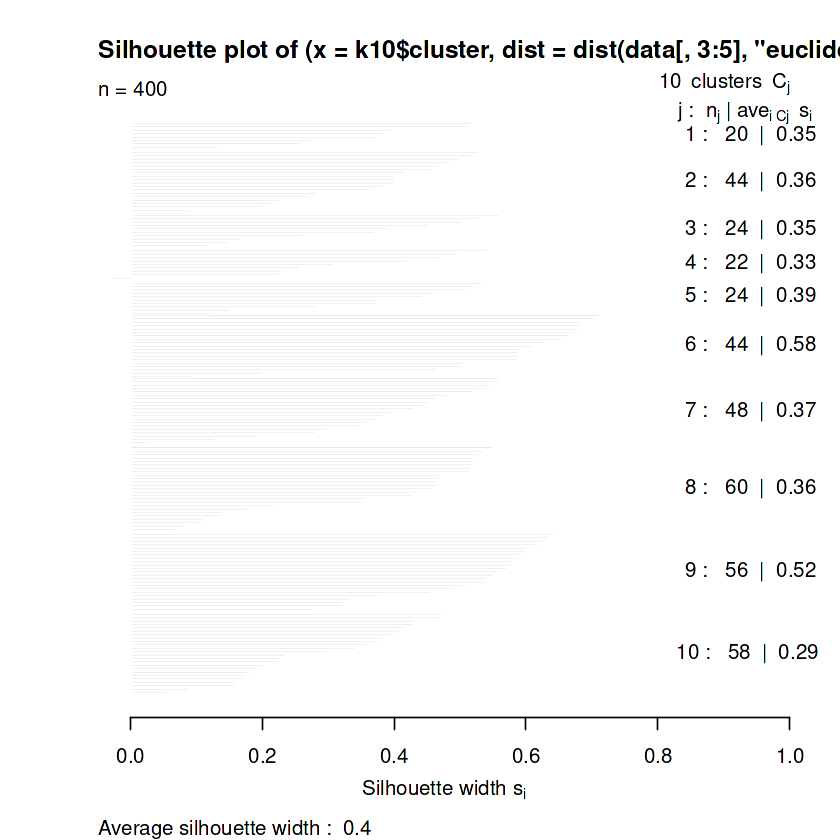

In [22]:
k10<-kmeans(data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(data[,3:5],"euclidean")))

In [23]:
library("ggplot2")

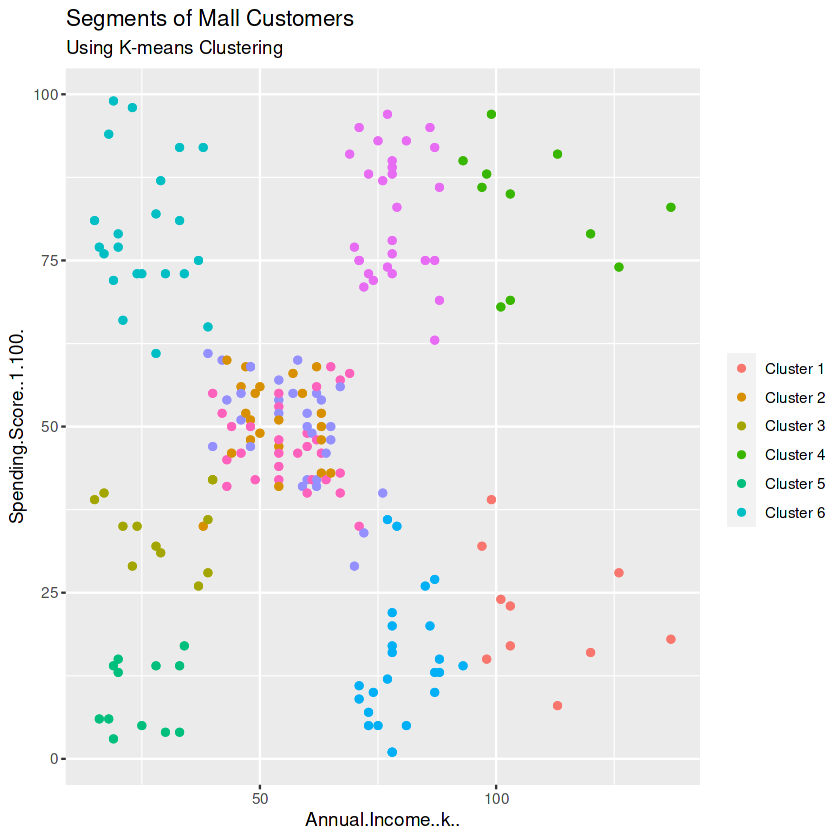

In [24]:
set.seed(1)
ggplot(data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k10$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

**We have clustered customers with their annual income w.r.t their spending score**

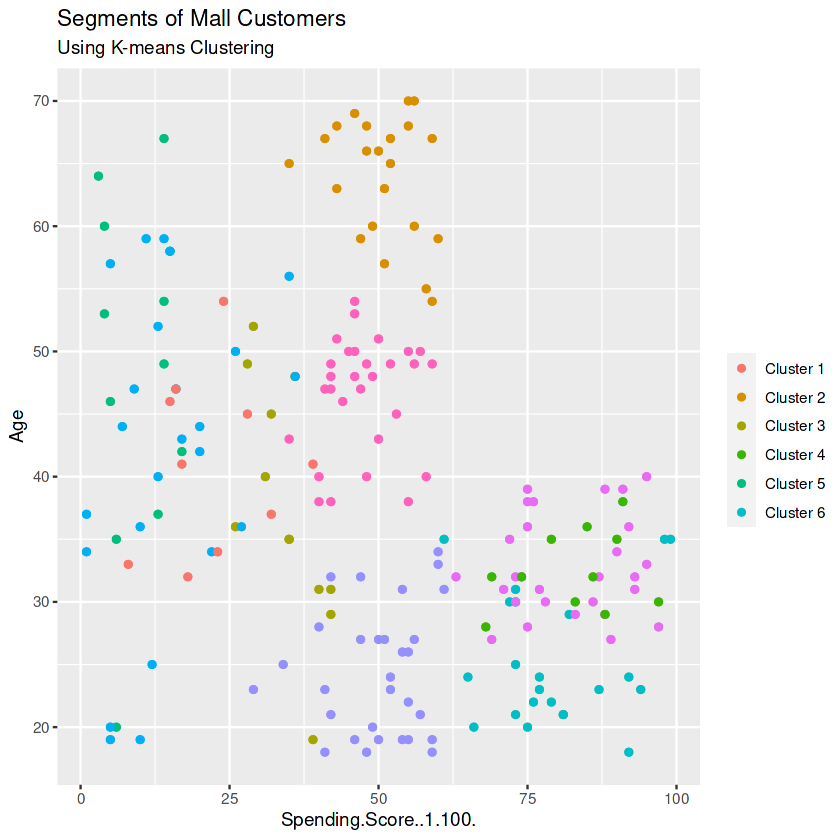

In [25]:
ggplot(data, aes(x =Spending.Score..1.100., y =Age)) + 
  geom_point(stat = "identity", aes(color = as.factor(k10$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

**Clustered w.r.t to age group and spending score**

In [26]:
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

In [27]:
digCluster<-k10$cluster
dignm<-as.character(digCluster)